# Homework Week 8

For each of the following questions please show that the statistical assumptions for each of the respective tests are met. It is good practice always before start using statistical analysis to do descriptive statistics to understand you data. It is not required to show descriptive analysis here unless there is something important to report (transformations, deviation from normality, outliers, etc).

1. The data in the table give the infant mortality rates per 1000 livebirths in the United States for the period 1960-2000


![title](HW1.png)

a. Fit a linear regression line relating infant mortality rate to chronological year using these data. Use a data transformation if necessary

b. Test for significance of the linear relationship

c. If the present trend continues for the next 5 years what would be the predicted infant mortality rate in 2010


### A. Fit a linear regression line relating infant mortality rate to chronological year using these data.

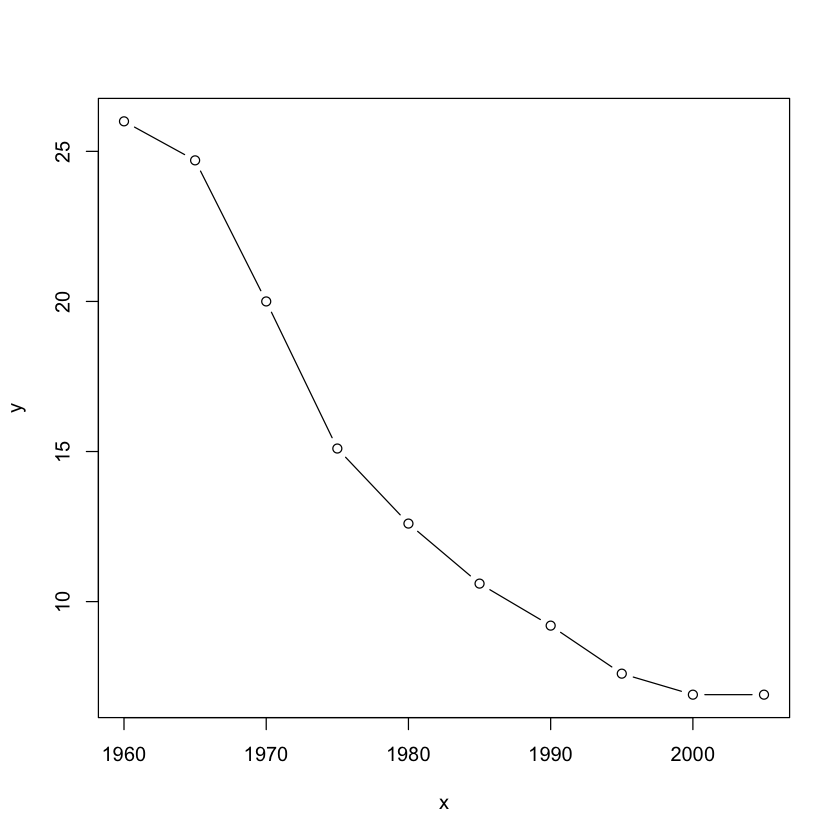

In [1]:
# Let's start just by just plotting the data

x <- c(1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005)
y <- c(26.0, 24.7, 20.0, 15.1, 12.6, 10.6, 9.2, 7.6, 6.9, 6.9)
plot(x,y, type="b")

# There do not appear to be any outliers. It also appears that a quadratic fit may be better.

In [5]:
# Let's look at Pearson's correlation coefficient
# There's clearly a correlation
 cor.test(x, y)


	Pearson's product-moment correlation

data:  x and y
t = -9.2434, df = 8, p-value = 1.522e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9898821 -0.8207686
sample estimates:
       cor 
-0.9562345 


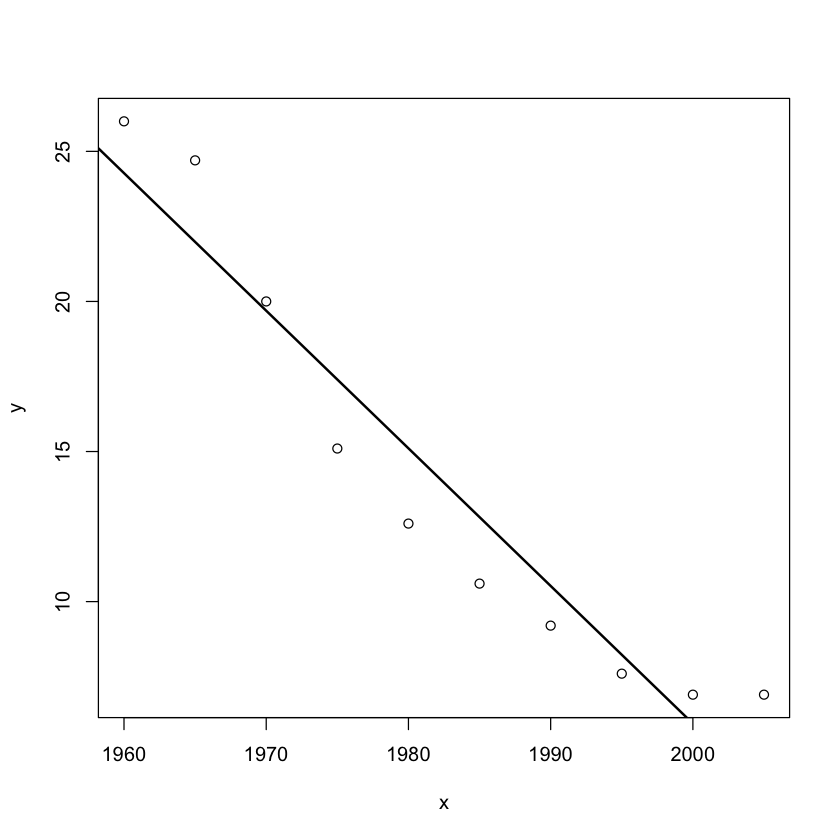

In [6]:
# Let's start with simple linear regression

model <- lm(y ~ x)
plot(x,y)
abline(model, lwd=2)

In [44]:
df <- data.frame(x = x, x.sqrd = x**2,y = y)

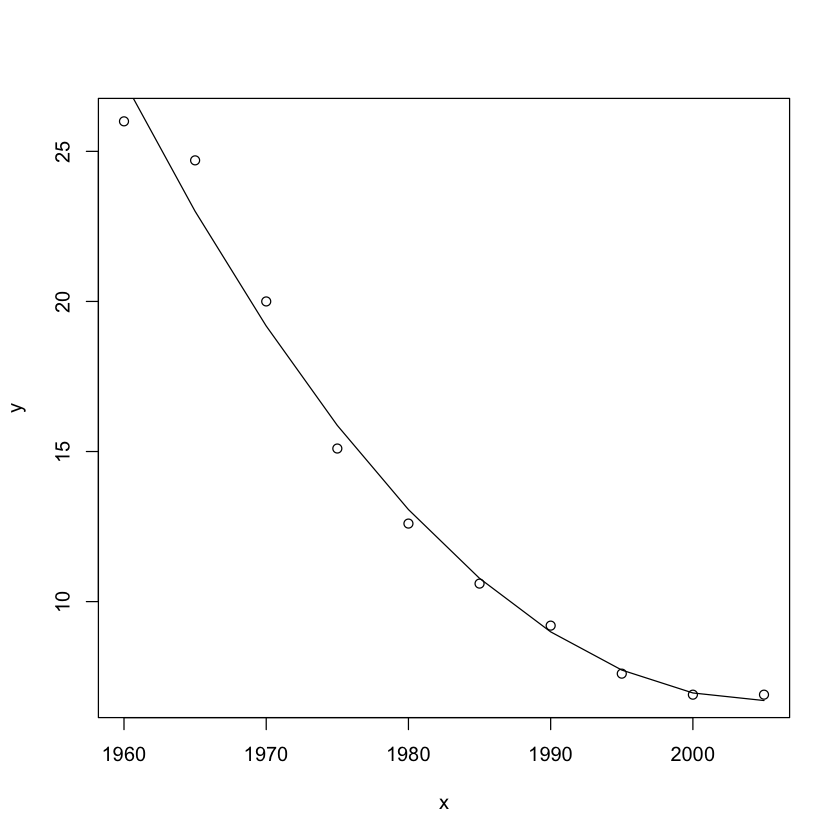

In [45]:
# Let's transform this into a quadratic space
# This is a much better fit

x2 <- x**2
quadratic.model <- lm(y ~  x + x.sqrd, data=df)
y_hat <- predict(quadratic.model)

plot(x,y)
lines(x, y_hat)

## b. Test for significance of the linear relationship
Now let's view a summary of the quadratic model

This R-squared value shows that a large amount (0.9868) of the outcome variable is explained by the dependent variable (year). The P-value is very low and the F-statistic is very high (if I'm understanding [this table](http://www.statisticshowto.com/tables/f-table/) correctly, the critical F-values with 2 and 7 DFs is 3.25744), meaning that this regression is clearly statistically significant.

In [4]:
summary(quadratic.model)


Call:
lm(formula = y ~ x + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33364 -0.39364 -0.08856  0.20466  1.69788 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.100e+04  6.476e+03   6.331 0.000392 ***
x           -4.089e+01  6.533e+00  -6.259 0.000421 ***
x2           1.020e-02  1.648e-03   6.189 0.000450 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9465 on 7 degrees of freedom
Multiple R-squared:  0.9868,	Adjusted R-squared:  0.983 
F-statistic: 261.1 on 2 and 7 DF,  p-value: 2.663e-07


### c. If the present trend continues for the next 5 years what would be the predicted infant mortality rate in 2010
The predicted morality rate is 6.96 .

In [19]:
list(2010, 2010**2)

[[1]]
[1] 2010

[[2]]
[1] 4040100

In [47]:
new.year <- data.frame(x = c(2010), x.sqrd = c(2010**2))
new.year

x,x.sqrd
2010,4040100


In [48]:
pred <- predict(quadratic.model, newdata = new.year)
pred

1 
6.961667

# 2
The file HackerRank-Developer-Survey-2018-Numeric.csv shows an extensive survey obtained in 2016 to 25000 Hackers. The survey asked developers many questions around their skills, educational background, current role, and more... Answer the following questions using the data from this file. The file HackerRank-Developer-Survey-2018-Numeric-Mapping.csv has the metadata that explains the coding on each variable. 
This data was obtained from Kaggle at [https://www.kaggle.com/hackerrank/developer-survey-2018](https://www.kaggle.com/hackerrank/developer-survey-2018) There is more information regarding the survey and the data itself at the website.

a. Is there a relationship between gender and the Age that the hacker begin coding(q1AgeBeginCoding)? (Use a logistic regression)

b. Does age to begin coding, and gender have an effect on job level (q8JobLevel)? (Use MLR)

c. There is an increase focus on understanding trends about women pursuing careers as developers are there any relationships in the data that could be useful advice to women that want to pursue a career as a developer? The zip file has many other variables that you can use for this analysis. 

### a. Is there a relationship between gender and the Age that the hacker begin coding(q1AgeBeginCoding)?

In [54]:
data_path <- 'developer-survey-2018/HackerRank-Developer-Survey-2018-Values.csv'
df <- read.csv(data_path)
#head(df)

In [4]:
nrow(df)

[1] 25090

In [13]:
df$q1AgeBeginCoding = factor(df$q1AgeBeginCoding)
df$q3Gender = df$q3Gender

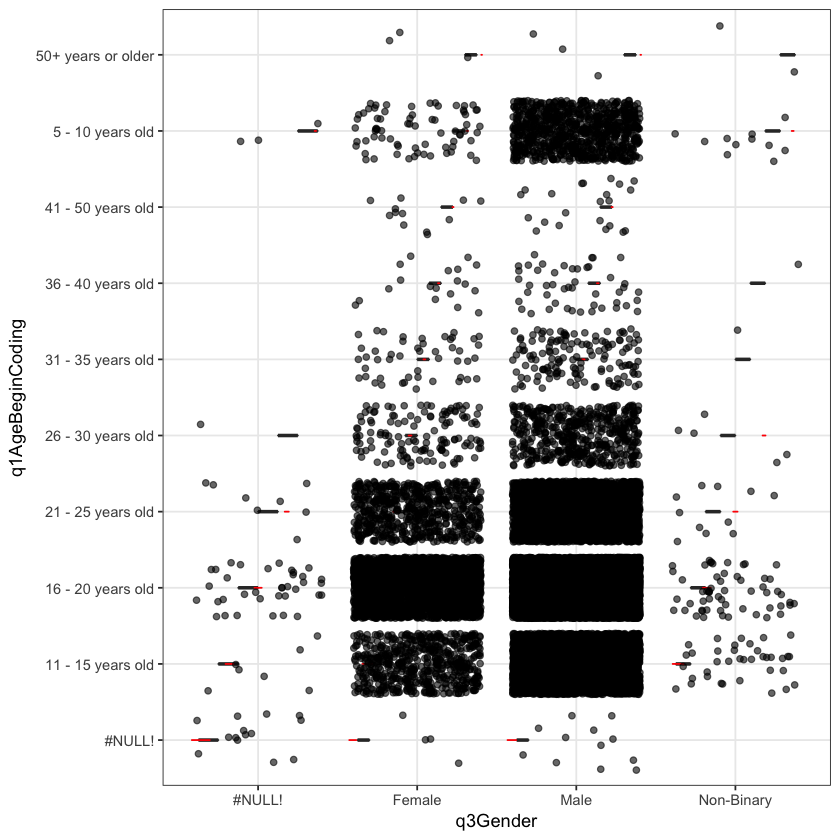

In [17]:
library(ggplot2)
ggplot(data = df, aes(x = q3Gender, y = q1AgeBeginCoding)) +
  geom_boxplot(alpha = 0.2) +
  geom_violin(fill='red', color='red',  alpha=0.4) +
  geom_jitter(alpha = 0.6, color = "black") + 
  theme_bw()

In [32]:
unique(df$q3Gender)

[1] Female     Male       Non-Binary #NULL!    
Levels: #NULL! Female Male Non-Binary

In [38]:
unique(df$q1AgeBeginCoding)

[1] 16 - 20 years old  11 - 15 years old  41 - 50 years old  26 - 30 years old 
 [5] 21 - 25 years old  5 - 10 years old   36 - 40 years old  31 - 35 years old 
 [9] #NULL!             50+ years or older
10 Levels: #NULL! 11 - 15 years old 16 - 20 years old ... 50+ years or older

In [43]:
# For simplicity's sake, i will exclude rows that identify as gender non-binary
# Until we learn more about interpreting multinomial logistic regression
# Plus, there are very few instances of this
df <- df[(df$q3Gender == 'Female' | df$q3Gender == 'Male') && (df$q1AgeBeginCoding != '#NULL!'),]

In [44]:
nrow(df)

[1] 24896

In [52]:
model <- glm( q1AgeBeginCoding ~ q3Gender, family = binomial(link='logit'), data = df_bin)

In [53]:
summary(model)


Call:
glm(formula = q1AgeBeginCoding ~ q3Gender, family = binomial(link = "logit"), 
    data = df_bin)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8617   0.0340   0.0340   0.0340   0.0441  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)    6.9368     0.5002  13.867   <2e-16 ***
q3GenderMale   0.5191     0.5776   0.899    0.369    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 267.19  on 24895  degrees of freedom
Residual deviance: 266.45  on 24894  degrees of freedom
AIC: 270.45

Number of Fisher Scoring iterations: 10


## Conclusions
This high p-value (0.369) shows that there is not a correlation between binary gender and the age to begin coding.

# 3 
The data set below represents the expected recovery time (in weeks) for patients after a surgical procedure with different post-operational methods for recovery. Negative values represent a faster recovery time than expected. The control patients followed a rutine post-operational for this type of procedure.

Using the data set below compare the effect of three treatments on the expected time of recovery after surgery. (Use ANOVA)

In [45]:
Recovery = c(.53, .36, .20, -.37, -.60, -.64, -.68, -1.27, .73, .31, .03, -.29, -.56, -.96, -1.61,
         -.78, -.86, -1.35, -1.48, -1.52, -2.04, -2.83)
treatment = c(rep("control",8), rep("surgery",7), rep("acupunture",7))
data = data.frame(Recovery, treatment)


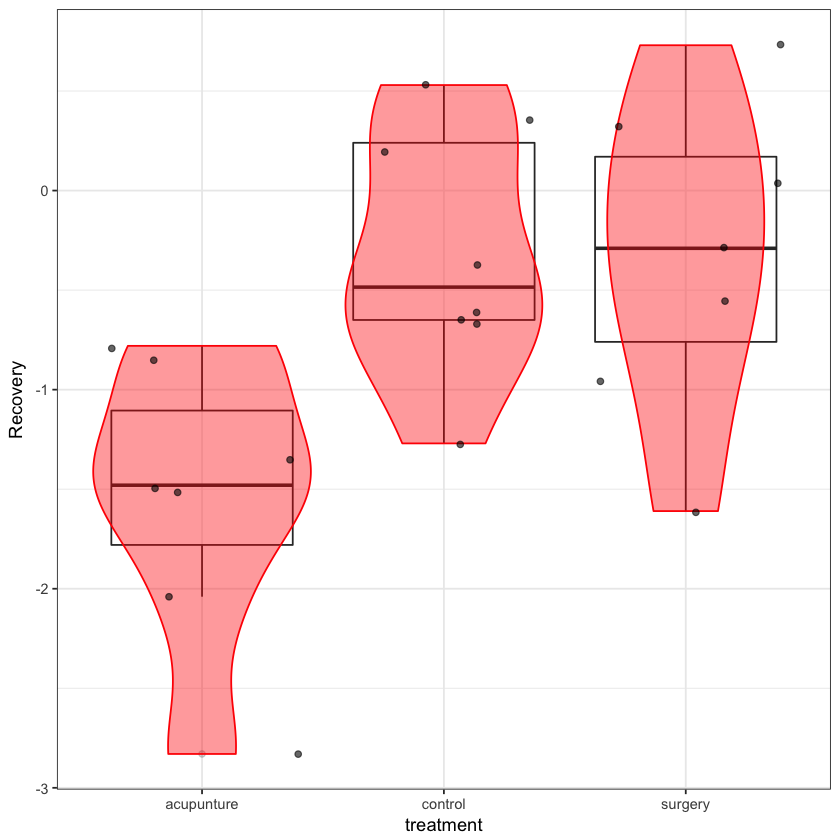

In [46]:
ggplot(data = data, aes(x = treatment, y = Recovery)) +
  geom_boxplot(alpha = 0.2) +
  geom_violin(fill='red', color='red',  alpha=0.4) +
  geom_jitter(alpha = 0.6, color = "black") + 
  theme_bw()

In [48]:
model <- aov(Recovery ~ treatment, data = data)

In [49]:
summary(model)

            Df Sum Sq Mean Sq F value  Pr(>F)   
treatment    2  7.224   3.612   7.289 0.00447 **
Residuals   19  9.415   0.496                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [50]:
TukeyHSD(model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Recovery ~ treatment, data = data)

$treatment
                          diff        lwr       upr     p adj
control-acupunture  1.24267857  0.3171207 2.1682364 0.0078656
surgery-acupunture  1.21571429  0.2598022 2.1716263 0.0116776
surgery-control    -0.02696429 -0.9525222 0.8985936 0.9969851


## Conclusion

Doing multiple pair-wise comparisons between the 3 groups shows that:
- There is a significant difference between acupuncture and the other two groups (p = 0.0079 and 0.0117)
- There is not a significant difference between surgery and control (p = 0.997). 
- This shows that in this sample, acupuncture offers a significantly smaller recovery time.